## Network Science Project 2 (Version 2)
A line of code in part 1.1) has been modified, see comment below

Name: Francesco Piatti

CID: 01730921

Please enter your name and 8-digit college ID in the cell above

### Part 1

1) Analyze the function *Graph1* in the cell below. Place your discussion in the cell below the function where indicated.

In [4]:
import networkx as nx
#You may also use numpy and the collections module.
#Do not use networkx functions other than the methods for the input graph G
#Do not import/use other modules without explicit permission.

def Graph1(G,x):
    """
    Input:
    G: simple, undirected NetworkX graph with nodes numbered from 1 to N
    x: an integer, 1<=x<=N
    """

    L1 = [0 for i in G.nodes()]  #list of connectedness (1 is connected, 0 otherwise)                         
    L2 = [-1 for i in G.nodes()] #List of distances                         
    L = [list(G.nodes()),L1,L2,L1.copy(),L1.copy()]       
    L[1][x-1] = 1          # Initilaizing connectedness                               
    L[2][x-1] = 0          # Initializing distance                               
    L[3][x-1] = 1          # Initializing number of shortest path (notice that p_xx = 1)
    L[4][x-1] = G.degree(x)  # Initializing degree of node x

    M = [x]      
    ind = 0
    while ind<len(M):
        n = M[ind]
        ind = ind+1
        for i in G.adj[n]:
            if L[1][i-1]==0:
                L[1][i-1]=1
                L[2][i-1]=L[2][n-1]+1
                L[3][i-1] = L[3][n-1]
                L[4][i-1] = L[4][n-1] + G.degree(i)*L[3][n-1]
                M.append(i)
            elif L[2][i-1]==L[2][n-1]+1:
                L[3][i-1] = L[3][i-1]+L[3][n-1] 
                L[4][i-1] = L[4][i-1] + L[4][n-1]+G.degree(i)*L[3][n-1]
                
    return L

**Output of the function:**

$L0[i]$ is the node index.

$L1[i]$ is 1 if node i is reachable from node x, 0 otherwise. 

$L2[i]$ is the distance from node x to node i, -1 if not reachable. 

$L3[i]$ is the number of shortest paths (of distance $L2[i]$) from node i to node x. 

$L4[i]$ is the sum of the degrees of the nodes which are in any of the shortest path between node i and node x

**Explanation:**

The algorithm is very similar to BFS since it also contains it. 

It starts from the source node and goes to its neighbors, which are appended to the queue (and will be analysed later).

If the neighbor is unexplored, $L[1]$ becomes 1 since it is connected, 1 is added to the distance of the neighbor to the source node ($L[2][i-1]+=1)$ (otherwise it would have already been explored since we are using a BFS). 

$L[3]$, i.e. the number of shortest path of node i (neighbor of n) to source node, is set to be the same as the number of shortest path from n to a (remember that $p_{ai}=p_{an}\cdot p_{ni}$ and in this case $p_{ni}$=1 since they are neighbors). Finally $L[4][i-1]$ becomes the same as the one of its neighbor plus the degrees of node i times the shortest path from node n to a.

On the other hand if a neighbor of the node in the queue we are considering has already been explored, if its distance to teh source node is the same or smaller as n's, we don't do anything, if it is greater we want to add a shortest path from i to the source node. As far as $L[4]$ is concerned you add to it the degrees of node i times the shortest path from node n to a and the sum of the degrees of the nodes which are in any of the shortest path between node n and the source node 

This algorithm iterates thorugh nodes in queue, inside a *while loop*. 

**Computational cost:**

The computational cost of the Graph1 function, representing the approximate number of steps the computer needs to find the outputs of the function on a network of N nodes and L links, is $O(N + L)$. It is linear in N and L as each node needs to be appended to the queue and "visited" at most once, and each link has to be tested only once.

2) Complete *Graph2* below to compute source edge centrality. Place your discussion in the cell below the function where indicated.

In [58]:
def Graph2(G,a,gamma0=1):
    """
    Input:
    G: simple, connected, undirected NetworkX graph with N nodes numbered from 1 to N and L links
    a: source node
    gamma0: parameter used in edge centrality calculation
    
    Output: Lf: a L-element list. The ith element of the list contains the source edge centrality
    for the i+1th edge in G.edges()
    """

    # Create dictionary Dlink mapping node-pairs to link number
    # Dlink[i][j] will give a number between 1 and L corresponding to
    # the label for link i-j
    Dlink = {}
    for i,e in enumerate(G.edges()):
        if e[0] in Dlink:
            Dlink[e[0]][e[1]]=i+1
        else:
            Dlink[e[0]]={e[1]:i+1}

        if e[1] in Dlink:
            Dlink[e[1]][e[0]]=i+1
        else:
            Dlink[e[1]]={e[0]:i+1}
    #--------------------------------
    
    def Graph1_with_leafnodes(G,a):
        """
        Input:
        G: simple, undirected NetworkX graph with nodes numbered from 1 to N
        x: an integer, 1<=x<=N
        
        Output:
        L[0] = List of node indexes
        L[1] = List of 1 if connected, 0 otherwise
        L[2] = List of distances 
        L[3] = List of shortest paths
        L[4] = List of leaf nodes
        """
        L1 = [0 for i in G.nodes()]                 #Nodes indexes
        L2 = [-1 for i in G.nodes()]                          
        L = [list(G.nodes()),L1,L2,L1.copy(),[]]
        L[1][a-1] = 1
        L[2][a-1] = 0
        L[3][a-1] = 1

        M = [a]
        ind = 0
        while ind<len(M):
            n = M[ind]
            ind = ind+1
            leafnode_ind = 1              #Initialize indicator, if remains 1 it is a leaf node    
            for i in G.adj[n]:
                if L[1][i-1]==0:                 # If node n has an unexplored neighbor, since we are using BFS,
                    L[1][i-1]=1                  # it cannot be a leaf node
                    L[2][i-1]=L[2][n-1]+1        
                    L[3][i-1] = L[3][n-1]        
                    M.append(i)
                    leafnode_ind = 0
                elif L[2][i-1]==L[2][n-1]+1:     # If distance we can find further node from a between the neighbors 
                    L[3][i-1] = L[3][i-1]+1      # of n, then n cannot be a leaf node
                    leafnode_ind = 0

            if leafnode_ind == 1:
                # Since the two conditions presented above represent both sufficient and necessary conditions
                # for n not to be a leaf nodes, we have excluded all non-leaf nodes.
                L[4].append(n)
                
        return L
                
    def order_by_distance(queue, distance):
        """
        Input: queue list and list of distances from source node
        Output: queue list where the nodes are ordered by non-increasing distance
        
        """
        if len(queue) == 1:     # If the lenght of the queue is 1, then no need to reorder it 
            return queue

        else:
            list1 = []
            for node in queue:     # Sorted method to order the queue by non increasing distance from a
                list1.append([node, distance[node-1]])
                list1 = sorted(list1, key = lambda d: d[1], reverse = True)

            return([d[0] for d in list1])
        
        
    #Initialize Lf list with 0s and length = number of edges
    Lf = [0 for i in range(len(G.edges()))]
    
    #Run graph1 function modified (such that one of the outputs is the list of leaf nodes)
    L = Graph1_with_leafnodes(G,a)
    #Extract the different outputs
    nodes_list = L[0]
    distance = L[2]
    shortest_paths = L[3]
    leaf_nodes = L[4]
    
    #Initialize a list which will allow us to do stage 2: the backward sweep
    queue = []
    
    for beta in leaf_nodes:
        
        for alpha in G.adj[beta]:    #If alpha is a neighbor of a leaf node
            # If a leaf node is connected to another leaf node, the ebc of that link will be 0 
            # since, by definition of a leaf node, no shortest paths pass through taht link
            if distance[alpha-1] != distance[beta-1]:
                
                edge = Dlink[alpha][beta]
                # Computing w_alpha,beta,a is just p_{a,alpha}/p_{a,beta}
                Lf[edge-1] = shortest_paths[alpha-1]/shortest_paths[beta-1]*gamma0 
                           
                # Append alpha to the queue to do the backward sweep
                if alpha not in queue:
                    queue.append(alpha)
                
    # Reordering the queue by non-increasing distance with respect to the source node             
    queue = order_by_distance(queue,distance)
    ind = 0    
    
    while ind < len(queue):
        beta = queue[ind]      # We want to consider every beta in the queue to cover all the nodes
        ind += 1
        running_total = 0
        alpha_list = []        # Initialize list of alphas
        
        for b in G.adj[beta]:  # Consider the neighbors of the betas
         
            if distance[b-1] == (distance[beta-1]+1): #If b is further to the source
                
                edge = Dlink[beta][b]
                y_beta_b_a = Lf[edge-1]          # We have already computed omega_{beta,b,a}        
                running_total += y_beta_b_a      # Adding it to a running total
            
            elif distance[b-1] == (distance[beta-1]-1):  # If b is further to the source
                
                alpha_list.append(b)   # Beta is then one of what we called alphas
                
                if b not in queue:
                    queue.append(b) 
                    
        for alpha in alpha_list:
            # Compute the weighted ebc for the alphas just using the formula provided
            edge=Dlink[alpha][beta]
            Lf[edge-1]=shortest_paths[alpha-1]/shortest_paths[beta-1]*(gamma0 + running_total)

        # Reorder the queue
        queue=order_by_distance(queue,distance)

    return Lf

In [111]:
# Checking

F = nx.Graph()
e = [(1,2),(2,4),(1,3),(3,4),(4,5)]
F.add_edges_from(e)

H = nx.Graph()
e = [(1,2),(2,4),(1,3),(3,4),(4,5),(5,6),(2,7)]
H.add_edges_from(e)

Z = nx.Graph()
e = [(1,2),(1,3),(2,4),(3,4),(4,5),(6,4),(5,6)]
Z.add_edges_from(e)

print(Graph2(F,1))
print(Graph2(H,1))
print(Graph2(Z,1))


[2.0, 2.0, 1.0, 1.0, 1.0]
[3.5, 2.5, 1.5, 1.0, 1.5, 2.0, 1.0]
[2.5, 2.5, 1.5, 1.5, 1.0, 1.0, 1.0]


To compute the edge betweenness centrality we will follow step by step the algorithm provided in the lectures.

i) define a function *Graph1_with_leafnodes* which has the same outputs of *Graph1* as well as a list of leaf nodes. To produce this list we have to notice that the necessary and sufficient condition for a node to be a leaf node is that, in the BFS algorithms, it cannot have any unexplored nodes and that its neighbors have a smaller distance to the source node.

ii) we have to define another function that will be useful later. This function has as input a list of nodes and reorders these nodes such that their distance from the source node is non-increasing. (The method provided was studied in last-year module Intro to Computation)

iii) **Computing edge betweenness centrality**

we have that 

$$w_{\alpha\beta a}=\sum_{b=1}^N \gamma_{\beta b}\frac{m_{\alpha \beta}(a,b)}{p_{ab}}$$

To re-write this expression in a more manageble form, we analyse $m_{\alpha\beta}(a,b)$, i.e. the number of shortes paths between nodes a and b that include link $\alpha - \beta$. We can deduce that if b is closer to the source node a than $\beta$, then $m_{\alpha\beta}(a,b)=0$. 

Furthermore if $b=\beta$, then $m_{\alpha\beta}(a,b) = m_{\alpha\beta}(a,\beta) = p_{a\alpha}$. Also, by hypothesis, $\gamma_{b\beta} = \gamma_0$ if $b=\beta$ and 1 otherwise.

Re-writing the expression we get that 

$$w_{\alpha\beta a}=\gamma_0\frac{m_{\alpha \beta}(a,\beta)}{p_{a\beta}}  +\sum_{b=1, \\b\neq\beta}^N 1\cdot\frac{m_{\alpha \beta}(a,b)}{p_{ab}}$$

$$= \gamma_0\,\frac{p_{a\alpha}}{p_{a\beta}} + \sum_{b\in\mathbb{N}_\beta}\frac{p_{a\alpha}}{p_{a\beta}}\omega_{\beta ba} = \frac{p_{a\alpha}}{p_{a\beta}}\,\left(\gamma_0+\sum_{b\in\mathbb{N}_\beta}\omega_{\beta ba}\right)$$

When it comes to edges connected to leaf nodes, the computation is easy because, by definition of leaf node, all the $b\in\mathbb{N}_\beta$ must be closer to the source node than $\beta$. This means that $\omega_{\beta ba}=0$ $\forall b$ since $m_{\beta b}(a,b)=0$ (by the reason we explained before). 

However, we have to insert an if clause: in fact, if two or more leaf nodes are connected, then the edges in between have ebc equal 0 since, intuitively, there are no shortest path passing through that nodes (it would mean that a shortest path would pass through a leaf node).

Thus our expression for leaf nodes is reduced to $\ \ \omega_{\alpha\beta a}=\frac{p_{a\alpha}}{p_{a\beta}}\cdot\gamma_0$

iv)  We now want to initialize a queue that will allow us to do the *backwards sweep* from nodes furthest away from a towards a. The idea is to compute $\omega_{\alpha\beta a}$ for each edge $\alpha-\beta$ using the result of previous iterations. Yet, it is important that the previous iterations operate on further nodes from the source so we can use the fact that if b is closer to the source node a than $\beta$, then $m_{\alpha\beta}(a,b)=0$, also we need to do that in order to compute teh running total as described below. That is the reason of the function we defined in point ii). 

Now we add the neighbors of the leaf nodes to the queue (unless they are leaf nodes themselves), which will represent our new $\beta$s. Then for these $\beta$s we consider their neighbors 'b'. For each neighbor, if it is further for the source, it means we have already computed $\omega_{\beta ba}$ so we add that to a running total. If the neighbor is closer to the source than the $\beta$, it will be an $\alpha$ so we append it to the *alpha_list*. 

Finally for each alpha list we evaluate $\frac{p_{a\alpha}}{p_{a\beta}}\,\left(\gamma_0+\sum_{b\in\mathbb{N}_\beta}\omega_{\beta ba}\right)$ where $\sum_{b\in\mathbb{N}_\beta}\omega_{\beta ba}$ is given by the running total.

Finally, before continuing the while loop, we reorder once again the queue to take into account the nodes added in the meantime.

**Computational cost:**

The computational cost is similar to Graph1 function. Infact the idea is the same as the one used in BFS, go through every node ones (appending it to the queue for the while loop) and also every link is analysed one (beacuse we included if clauses that prevents overlapping).


### Part 2

In [7]:
import numpy as np
import networkx as nx
from networkx import community as com
import matplotlib.pyplot as plt
%pylab inline
from scipy.integrate import odeint
import itertools

#Run this cell to create load graph to be analyzed
elist = np.loadtxt('project2.dat',dtype=int)
N = elist.max()
G = nx.Graph()
G.add_nodes_from(range(1,N+1))
G.add_edges_from(elist)

Populating the interactive namespace from numpy and matplotlib


C:\Users\piatt\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


**2.1 (a) and (b)**: Complete SInet and RHS below

In [9]:
def SInet(G,i0=1,x0=0.001,beta=1.0,delta=1.0,omega=80.0,tf=0.4,Nt=1000):
    """
    Questions 2.1 and 2.2
    Simulate naive network-SI model with time-periodic transmission

    Input:
    G: Networkx graph (simple, connected, undirected with nodes numbered from 1 to N)
    i0: node which is initially infected
    x0: magnitude of initial condition
    beta,delta, omega: model parameters
    tf,Nt: Solutions are computed at Nt time steps from t=0 to t=tf (see code below)

    Output:
    tarray: Nt+1-element array of times at which solution is output
    xarray: Nt+1 x N Numpy array containing <x> across network nodes at
                each time step.
    """

    N = G.number_of_nodes()
    xarray = np.zeros((Nt+1,N))
    xarray[0,i0-1] = x0 #initial condition
    tarray = np.linspace(0,tf,Nt+1) #times at which solution should be returned

    A = nx.adjacency_matrix(G)
    A.toarray()
    
    def RHS(x,t):
        """Compute RHS of model at time t
        input: x should be a size N array corresponding to <x(t)> for all nodes
        output: dxdt, also a size N array corresponding to d<x>/dt for all nodes
        """
        s = 1-x
        
        dxdt=beta*(1+delta*np.cos(omega*t))*np.multiply((A.dot(x)),s)
        return dxdt

    xarray = odeint(RHS, xarray[0,:], tarray)
    
    return tarray,xarray


**2.1 (c)**

This code should be considered efficient since we do calculations using vectors and numpy instead of for loops, that would require much more time. The accurancy is related to how the function odeint evaluated the solution. 


### 2.2

FIRST PART OF THE ANALYSIS - COMPARING DIFFERENT BETA VALUES


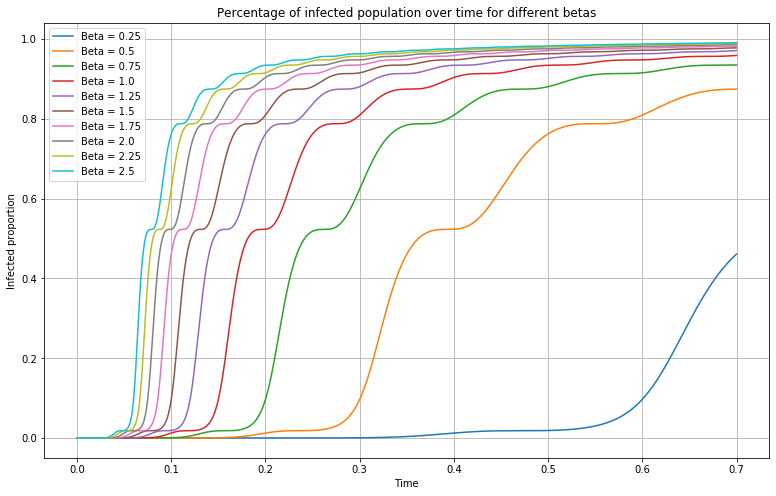

------------------------------------------------------
SECOND PART OF THE ANALYSIS - TIME TO REACH CERTAIN PROBABILITIES


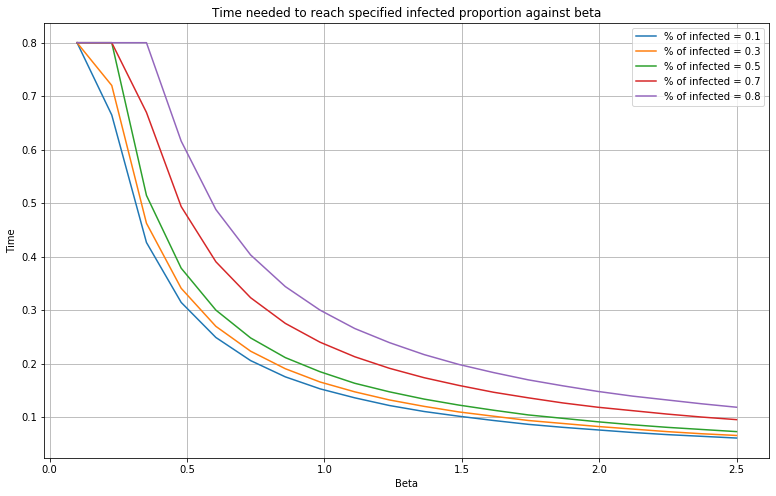

------------------------------------------------------
THIRD PART OF THE ANALYSIS - LINEARIZATION


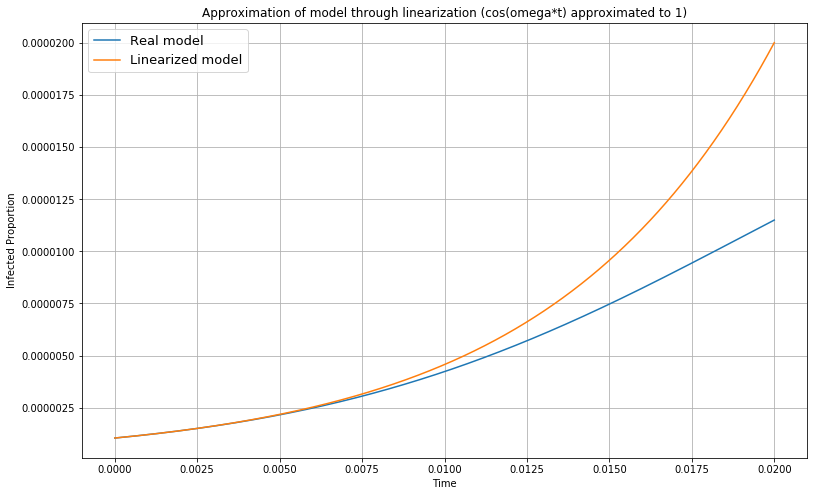

------------------------------------------------------
FOURTH PART OF THE ANALYSIS - LINEARIZATION


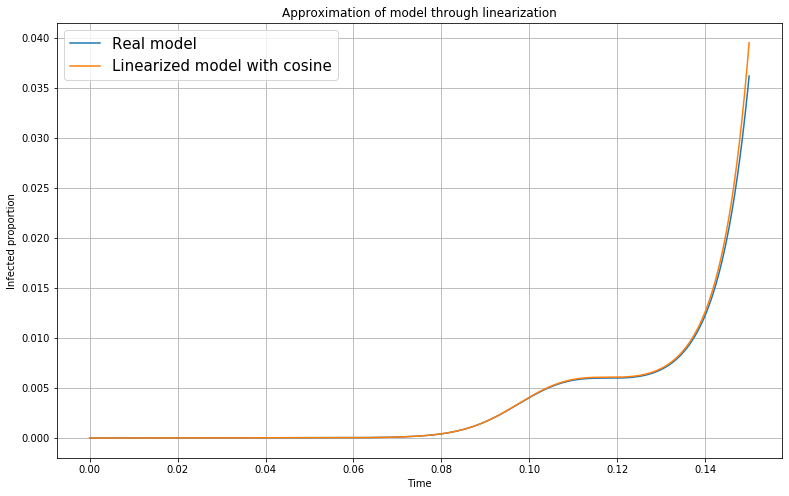

In [69]:
k = np.array(nx.degree(G),dtype=int)[:,1]
i0 = np.argmax(k)+1

Nt = 1000

# FIRST PART OF THE ANALYSIS
# Visualization of the solution of our model for different betas

print('FIRST PART OF THE ANALYSIS - COMPARING DIFFERENT BETA VALUES')

infected_percentage = np.zeros(Nt+1)     # Initialize list

plt.figure(1, figsize=(13,8))
plt.grid()
plt.xlabel('Time')
plt.ylabel('Infected proportion')
plt.title("Percentage of infected population over time for different betas")

for beta in np.linspace(0.25,2.5,10):    # Set an array of beta and compute averages for each
    delta = 1
    omega = 80 * beta
    tarray, xarray = SInet(G, i0, 0.001, beta, delta, omega, tf=0.7)
    
    for t in range(Nt+1):
        infected_percentage[t] = np.mean(xarray[t,:])   # compute averages
    
    label1 = "Beta = {}".format(beta)
    plt.plot(tarray, infected_percentage, '-', label = label1)

plt.legend()
plt.show()
print('------------------------------------------------------')

# SECOND PART OF THE ANALYSIS
#

print('SECOND PART OF THE ANALYSIS - TIME TO REACH CERTAIN PROBABILITIES')

plt.figure(2, figsize=(13,8))
plt.grid()
plt.xlabel('Beta')
plt.ylabel('Time')
plt.title("Time needed to reach specified infected proportion against beta")

for p in [0.1,0.3,0.5,0.7,0.8]:
    Nt = 1000
    time_list = []
    infected_percentage = np.zeros(Nt+1)
    
    for beta in np.linspace(0.1,2.5,20): 
        delta = 1
        omega = 80*beta
        SIsolution = SInet(G, i0, 0.001, beta, delta, omega, tf=0.8)
        
        for t in range(Nt+1):
            infected_percentage[t] = np.mean(SIsolution[1][t,:])

        s = 0
        while infected_percentage[s] < p and s < Nt:
            s += 1
        
        else:
            time_list.append(SIsolution[0][s])
        
        infected_percentage = np.zeros(Nt+1)
    
    label2 = "% of infected = {}".format(p)
    plt.plot(np.linspace(0.1,2.5,20), time_list, '-', label = label2)

plt.legend()
plt.show()
print('------------------------------------------------------')

# THIRD PART OF THE ANALYSIS
# Plot and compare solution of a linear model

print('THIRD PART OF THE ANALYSIS - LINEARIZATION')

# Define a new SInet function whose RHS model is our model linearized 

def SInetlin(G,i0=1,x0=0.001,beta=1.0,delta=1.0,omega=80.0*delta,tf=0.4,Nt=1000):
    """
    Input:
    G: Networkx graph (simple, connected, undirected with nodes numbered from 1 to N)
    i0: node which is initially infected
    x0: magnitude of initial condition
    beta,delta, omega: model parameters
    tf,Nt: Solutions are computed at Nt time steps from t=0 to t=tf (see code below)

    Output:
    tarray: Nt+1-element array of times at which solution is output
    xarray: Nt+1 x N Numpy array containing solution for our linearized model (without the 
            cosine factor) across network nodes at each time step.
    """

    N = G.number_of_nodes()
    xarray = np.zeros((Nt+1,N))
    xarray[0,i0-1] = x0 #initial condition
    tarray = np.linspace(0,tf,Nt+1) #times at which solution should be returned

    A = nx.adjacency_matrix(G)
    A.toarray()
    
    def RHS2(x,t):
        
        dxdt=beta*2*A.dot(x)
        return dxdt

    xarray = odeint(RHS2, xarray[0,:], tarray)
    
    return tarray,xarray

plt.figure(3, figsize=(13,8))
plt.grid()
plt.xlabel('Time')
plt.ylabel('Infected Proportion')
plt.title("Approximation of model through linearization (cos(omega*t) approximated to 1)")

# Plot the solution found in 2.1 with beta =1
SIsolution = SInet(G, tf=0.02)

infected_percentage = np.zeros(Nt+1)

for i in range(Nt+1):
    infected_percentage[i] = np.mean(SIsolution[1][i])

plt.plot(SIsolution[0], infected_percentage, '-', label = 'Real model')

# Plot the solution of our linearized system
SILinsol = SInetlin(G, tf=0.02)

infected_percentage = np.zeros(Nt+1)

for i in range(Nt+1):
    infected_percentage[i] = np.mean(SILinsol[1][i])
    
plt.plot(SILinsol[0], infected_percentage, '-', label = 'Linearized model')
plt.legend(fontsize = 13)
plt.show()

print('------------------------------------------------------')

# FOURTH PART OF THE ANALYSIS
# Plot and compare solution of a linear model (with cosine factor)

print('FOURTH PART OF THE ANALYSIS - LINEARIZATION')

def SInetlin2(G,i0=1,x0=0.001,beta=1.0,delta=1.0,tf=0.4,Nt=1000):
    """
    Questions 2.1 and 2.2
    Simulate naive network-SI model with time-periodic transmission

    Input:
    G: Networkx graph (simple, connected, undirected with nodes numbered from 1 to N)
    i0: node which is initially infected
    x0: magnitude of initial condition
    beta,delta, omega: model parameters
    tf,Nt: Solutions are computed at Nt time steps from t=0 to t=tf (see code below)

    Output:
    tarray: Nt+1-element array of times at which solution is output
    xarray: Nt+1 x N Numpy array containing solution for our linearized model (with the 
            cosine factor) across network nodes at each time step.
    """
    N = G.number_of_nodes()
    xarray = np.zeros((Nt+1,N))
    xarray[0,i0-1] = x0 #initial condition
    tarray = np.linspace(0,tf,Nt+1) #times at which solution should be returned

    A = nx.adjacency_matrix(G)
    A.toarray()
    omega = 80*beta
    
    def RHS3(x,t):

        L = [0 for i in range(len(x))]
        
        dxdt=(1+delta*np.cos(omega*t))*beta*A.dot(x)
        return dxdt

    xarray = odeint(RHS3, xarray[0,:], tarray)
    
    return tarray,xarray

plt.figure(4, figsize=(13,8))
plt.grid()
plt.xlabel('Time')
plt.ylabel('Infected proportion')
plt.title("Approximation of model through linearization")

SIsolution = SInet(G, tf = 0.15)

infected_percentage = np.zeros(Nt+1)

for i in range(Nt+1):
    infected_percentage[i] = np.mean(SIsolution[1][i])

plt.plot(SIsolution[0], infected_percentage, '-', label = 'Real model')

SIlin2sol = SInetlin2(G, tf=0.15)

infected_percentage = np.zeros(Nt+1)

for i in range(Nt+1):
    infected_percentage[i] = np.mean(SIlin2sol[1][i])
    
plt.plot(SIlin2sol[0], infected_percentage, '-', label = 'Linearized model with cosine')
plt.legend(fontsize = 15)
plt.show()


#### First part of analysis

Here we present a comparison between different infection spread varying betas. We have taken 10 betas in range $[0.25,2.5]$ and, as might be expected, the greater the beta the faster the infection spreads out. (This is motivated simply by the fact that the velocity of the spread $d\langle x\rangle/dt$ is directly proportional to beta)

#### Second part of analysis

In the second part of our analysis we have examined the time the population need to reach a determined percentage of infected varying the betas. As we might expect, since the beta is directly proportional to the speed of the diffusion, as beta increases the time needed is lower. In the figure, we have plotted time needed for different value of ‘infected proportion'. 

#### Third part of analysis

We want to analyse the behaviour of the initial spread of the disease. To do so we use the technique of linearization.
To begin with, in this first step, since we are considering small $t$ we approximate the cosine to $1$. In fact for $t\approx 0$, the Taylor expansion of the cosine is $\cos(\omega t)\approx 1+\omega t$. Thus $1+\delta\cos(\omega t) \approx 2$ (since $\delta=1$).

Let $\langle x_i\rangle=\epsilon z_i+ O(\epsilon^2)$, then $d\langle x_i\rangle = \epsilon dz_i/dt$ and $s_i= 1-\epsilon z_i -O(\epsilon^2)$. Thus, ignoring $O(\epsilon^2)$ terms, $(1-\langle x_i\rangle)\langle x_j\rangle=(1-\epsilon z_i)\epsilon z_i$ $ = \epsilon z_i -\epsilon^2 (z_i)^2\approx \epsilon z_i$. If we substitute this into our original model (notice that the epsilons cancel out because they are factors on both the RHS and LHS) we get 

$$\frac{dz_i}{dt}=2\beta Az_i$$

Therefore we have modified the SInet function (the RHS part) to solve our linear model. The solution is clearly exponential and we see it apporximates well our model but just for a very small time frame ($\approx[0,0.01]$). 

#### Fourth part of analysis

Here, once again we want to approximate the beginning of the spreading process through the linearisation technique. Yet this time we keep the factor $1+\delta\cos(\omega t)$. We can do this because the perturbation we have considerted are independent of t. The model will thus be 

$$\frac{dz_i}{dt}=\beta\,[1+\delta\cos(\omega t)] Az_i$$

Notice how the approximation is better for a longer time frame $\approx [0,0.15]$ when compared to the one above. The reason behind this is that $\omega$ (i.e. teh frequency) is large so the cosine oscillates fast. As a consequence, from $1$ for $t=0$, it becomes small very fast, thus limiting the exponential behaviour of the solution of the linearized system without the cosine and allowing a better approximation for a longer time frame.

### 2.3

In [14]:
communities = com.greedy_modularity_communities(G)
print("modularity maximization, number of communities= ",len(communities))
print("modularity maximization, modularity= ", com.modularity(G, communities))
print("---------------------------------------")

out = com.girvan_newman(G)
k=8
c2 = []
print('Girvan-Newman method')
for communities1 in itertools.islice(out, k):
    c2.append(tuple(sorted(c) for c in communities1))
    print("G-N partition with %d communities" %len(c2[-1]))
    print("modularity= ", com.modularity(G,c2[-1]))
    print("-------------------")

modularity maximization, number of communities=  4
modularity maximization, modularity=  0.278630864167166
________________________________________
Girvan-Newman method
G-N partition with 2 communities
modularity=  0.00010629251220132692
-------------------
G-N partition with 3 communities
modularity=  0.00021256241859385472
-------------------
G-N partition with 4 communities
modularity=  0.00042497648656841325
-------------------
G-N partition with 5 communities
modularity=  0.0006371150462502139
-------------------
G-N partition with 6 communities
modularity=  0.0006370726603590149
-------------------
G-N partition with 7 communities
modularity=  0.0006370288616047838
-------------------
G-N partition with 8 communities
modularity=  0.0006369836499875028
-------------------
G-N partition with 9 communities
modularity=  0.0006369370255071854
-------------------


Notice that the partition obtained using the greedy modularity algorithm produces a much higher modularity when compared to each case where we apply girvan newman algorithm. Thus, in our analysis we will consider the partition given by greedy modularity, that divides the nodes in 4 subsets.



FIRST PART OF THE ANALYSIS


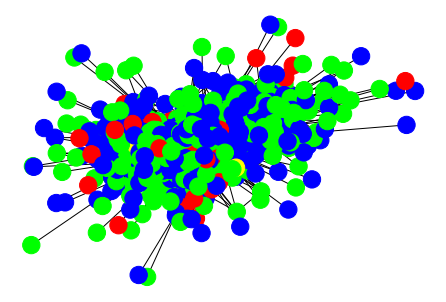

------------------------------------------------------
SECOND PART OF THE ANALYSIS
List of highest degree node per community: [646, 679, 309, 942]
Size of community 1: 456
Average degree of nodes in community 1: 36.19517543859649
Size of community 2: 424
Average degree of nodes in community 2: 41.945754716981135
Size of community 3: 77
Average degree of nodes in community 3: 42.84415584415584
Size of community 4: 5
Average degree of nodes in community 4: 7.0


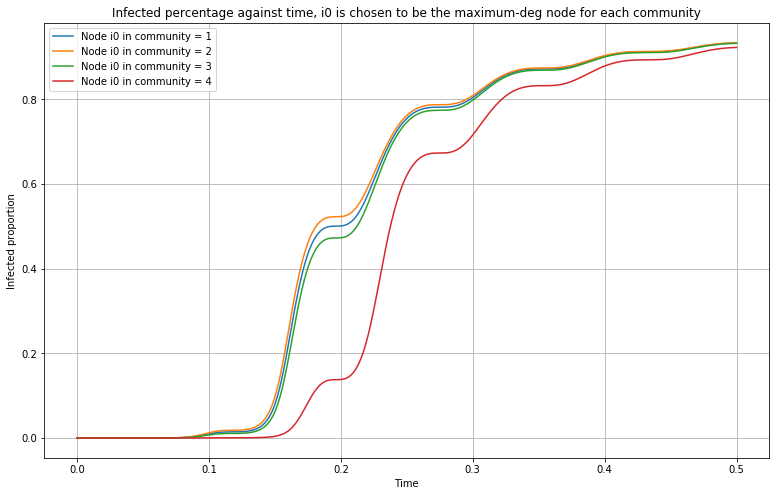

------------------------------------------------------
THIRD PART OF THE ANALYSIS
Degree of highest degree node of community 1: 1
Degree of highest degree node of community 2: 1
Degree of highest degree node of community 3: 1
Degree of highest degree node of community 4: 6


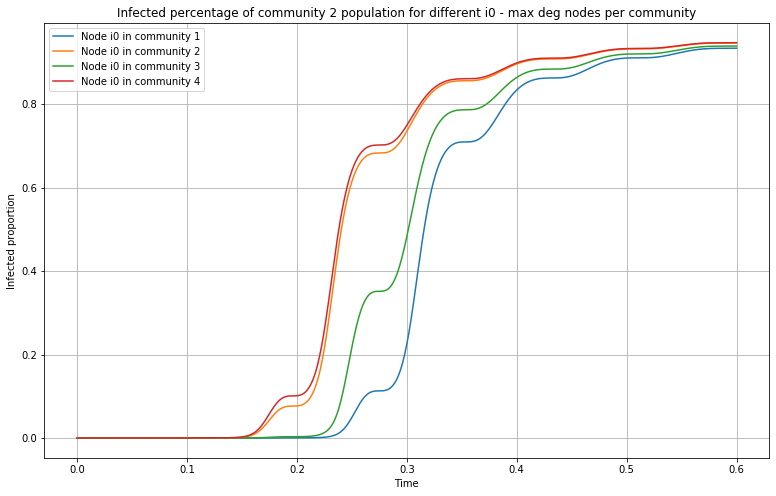

------------------------------------------------------
FOURTH PART OF THE ANALYSIS - Variance analysis


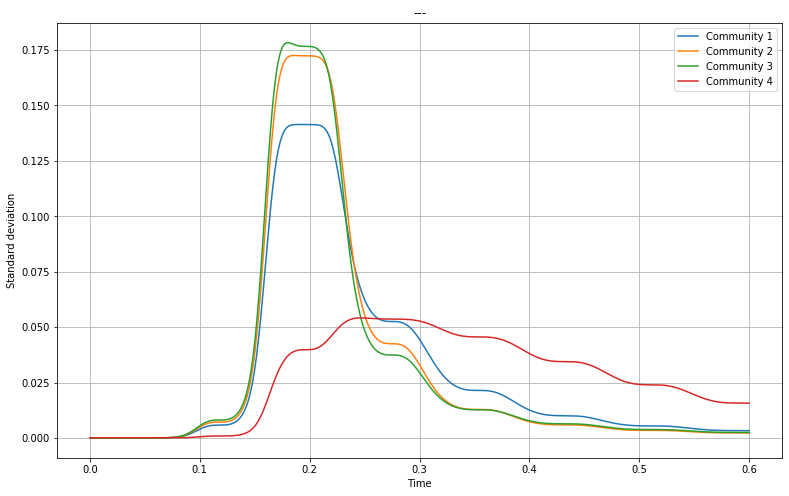

In [113]:
# FIRST PART OF ANALYSIS
# Here we draw the graph where nodes with different colors belong to different communities

print('FIRST PART OF THE ANALYSIS')

# Consider the communities obtained from the greedy modularity algorithm
communities_list = []
for i in range(len(communities)):
    communities_list.append(list(communities[i]))

color_map = [0 for n in range(G.number_of_nodes())]

for node in range(G.number_of_nodes()):
    if node in communities_list[3]:
        color_map[node]='yellow'
    elif node in communities_list[2]:
        color_map[node]='red'
    elif node in communities_list[1]:
        color_map[node]='blue'
    else: 
        color_map[node]='lime' 
        
nx.draw(G, node_color=color_map)
plt.show()
print('------------------------------------------------------')

# SECOND PART OF ANALYSIS
# Diffusion analysis of the overall population varying i0 

print('SECOND PART OF THE ANALYSIS')

i0_list_max = []   # list that will contain the max-deg node for each community
for i in range(len(communities_list)):
    k = np.array(nx.degree(G,nbunch=communities_list[i]),dtype=int)[:,1]
    ag = np.argmax(k)
    i0_list_max.append(communities_list[i][ag])
    
print('List of highest degree node per community:', i0_list_max)
 
for i in range(len(communities_list)):
    print('Size of community {}: {}'.format(i+1, len(communities_list[i])))
    average_degree = np.mean(np.array(G.degree(communities_list[i]))[:,1])
    print('Average degree of nodes in community {}: {}'.format(i+1, average_degree))
    
plt.figure(5, figsize=(13,8))
plt.grid()
plt.xlabel('Time')
plt.ylabel('Infected proportion')
plt.title('Infected percentage against time, i0 is chosen to be the maximum-deg node for each community')

# Computing the average infection probability for each i0
for i in range(len(i0_list)):
    
    SIsolution = SInet(G, i0 = i0_list_max[i], tf = 0.5)
    infected_proportion = np.zeros(Nt+1)
    
    for j in range(Nt+1):
        infected_proportion[j] = np.mean(SIsolution[1][j])
    
    label4 = "Node i0 in community = {}".format(i+1)
    plt.plot(SIsolution[0], infected_proportion, '-', label = label4)

plt.legend()
plt.show()
print('------------------------------------------------------')


# THIRD PART OF ANALYSIS
# Spread of the disease within community 1, changing i0

print('THIRD PART OF THE ANALYSIS')

i0_list_min = []   # list that will contain the max-deg node for each community
for i in range(len(communities_list)):
    k = np.array(nx.degree(G,nbunch=communities_list[i]),dtype=int)[:,1]
    ag = np.argmin(k)
    i0_list_min.append(communities_list[i][ag])

for i in range(len(i0_list_min)):
    print('Degree of highest degree node of community {}: {}'.format(i+1,G.degree(i0_list_min[i])))

prob_list = []
n_community = 1

for i0 in i0_list_min:
    
    SIsolution = SInet(G, i0, tf=0.6)
    # Computing the average infection probabilities only for the nodes in community 1
    running_total = 0
    
    for nodes in communities_list[n_community]:

        running_total += SIsolution[1][:,nodes-1]
        
    infected_proportion = running_total/len(communities_list[n_community])
    prob_list.append(infected_proportion) 

plt.figure(6, figsize=(13,8))
plt.grid()
plt.xlabel('Time')
plt.ylabel('Infected proportion')
plt.title('Infected percentage of community 2 population for different i0 - max deg nodes per community')   

SIsolution = SInet(G, i0=i0_list_min[n_community], tf=0.6)

for i in range(len(prob_list)):
    label3 = "Node i0 in community {}".format(i+1)
    plt.plot(SIsolution[0], prob_list[i], '-', label = label3)

plt.legend()
plt.show()
print('------------------------------------------------------')


# FOURTH PART OF ANALYSIS
# Variance analysis

print('FOURTH PART OF THE ANALYSIS - Variance analysis')

plt.figure(figsize=(13,8))
plt.grid()
plt.xlabel('Time')
plt.ylabel('Standard deviation')
plt.title('---')

SIsolution = SInet(G, tf=0.6)
average_infection_prob1 = np.zeros(Nt+1)

for i in range(Nt+1):
    average_infection_prob1[i] = np.mean(SIsolution[1][i])

for n in range(4):
    
    n_community = n
    prob_list = []
    for i0 in i0_list_max:

        SIsolution = SInet(G, i0, tf=0.6)
        running_total = 0

        for nodes in communities_list[n_community]:

            running_total += SIsolution[1][:,nodes-1]

        average_infection_prob = running_total / len(communities_list[n_community])
        prob_list.append(average_infection_prob)

    std = np.std(prob_list, axis=0)
    label5 = "Community {}".format(n+1)
    plt.plot(SIsolution[0], std, label = label5)

plt.legend()
plt.show()


#### First part of analysis

Here you can appreciate a nice plot of the graph, where the color of each node represents its community (given by the greedy modularity algorithm).

#### Second part of analysis

In this part of the analysis, we have changed the initial infected node (keeping the parameters as in 2.1) and we have plotted the infected proportion of the overall *population*. The i0 nodes are chosen to be the highest degree nodes for each community. Notice that if we start in community 4 (the smallest one, with only 5 nodes), there is a significant differrence (it spreads slower at the beginning) in the infected proportion line compared to the other cases. The reason behind this, relies in the structure of the graph and its communities. One of the parameter suitable for this analysis is the average degree per community: for community 4 this value is at least 5 times smaller than in the other 3 communities. 

As far as communities 1,2 and 3 are concerned, we see that there is not much difference in the spread of the disease when the i0 is the maximum degree node of one of these communities. Once again, a possible explanation is given by the relatively high average degree; in fact, we could expect that this high parameter is an indicator of the fact that these 3 communities are highly connected.

#### Third part of analysis

For this part we will not consider anymore the average infection rate for all the nodes in the graph, but we want to analyze this value for each community. This can be abstracted to real life and friends. For instance, let everyone be in a community of close friends (where the different communities are of course connected). We want to assess the average infection rate per community, when changing the i0 between the *minimum* degree nodes of the different communities.

In order to do so, we have firstly fixed a community (community number 2 in this case), then we have plotted a graph which shows paradoxically, that the spread of the disease in community 2 is faster if we choose the lowest degree node of community 4 instead of the lowest one in the community itself. That is explained by the fact that the minimum degree of community 4 is higher that the others. 

#### Fourth part of analysis

Last part of the analysis is strictly correlated to part 3, since, *for each community*, we would like to assess how the percentage of infected varying the i0 within *i0_list_min* (i.e. lowest degree nodes per community). In order to do so, we compute the standard deviation between the different solution of the model where x is represented by the nodes of *one single* community and i0 varies. (The same analysis has also been done considering i0_list_max - i.e. highest degree nodes per community - and it produces similar results). 

The communities most affected by the change of i0 (both within i0_list_max and i0_list_min) are communities 2 and 3, whereas community 1 is slightely less affected despite the similar number of nodes with community 2. 
The one less affected overall is by far community number 4. Yet, it can be argued that, as a result of the small number of nodes of community 3, the result for this community is not statistically significant. 

Overall, we have to point out that the values of all the standard deviations are quite small. 

#### Conclusions

From the 4 pieces of analysis above we conclude that, apart for community 4, the 3 other communities generated by the greedy modularity algorithm, despite forming a partition of the graph, they are strongly correlated